<h1 style="font-family: 'Times New Roman'; font-size: 30px;">Programación Digital Avanzada</h1>

<h1 style="font-family: 'Times New Roman'; font-size: 26px;">Trabajo Integrador Final</h1>

<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">1. Introducción</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">

Este trabajo aborda el diseño e implementación de una librería en Python para el procesamiento y análisis de señales de electroencefalografía (EEG), electrocardiografía (ECG) y electromiografía (EMG). Estas señales, fundamentales en bioingeniería, ingeniería biomédica, neurociencia y medicina, representan la actividad eléctrica generada por distintos sistemas biológicos y aportan información clave para el diagnóstico, la monitorización clínica y la investigación de diversas condiciones fisiológicas y patológicas.
</div>


<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">

Dado que el cuerpo humano es un medio conductor, es posible registrar estas señales mediante electrodos superficiales. Sin embargo, las señales suelen estar contaminadas con ruido y artefactos no deseados, como interferencias eléctricas o movimientos musculares involuntarios. Por ello, el procesamiento digital de señales es esencial para mejorar la calidad de los registros y extraer información relevante.
</div>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
La librería desarrollada en este proyecto permite cargar, procesar, visualizar y analizar señales EEG, ECG y EMG de forma modular. Para ello, se emplearon herramientas del ecosistema científico de Python, como NumPy y Pandas para el manejo eficiente de datos, Matplotlib para la visualización, y MNE para facilitar operaciones específicas. La implementación se estructuró aplicando principios de Programación Orientada a Objetos (POO), lo que favorece la escalabilidad y reutilización del código.</div>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
Entre las funcionalidades implementadas se incluyen filtrado de señales, segmentación temporal, detección de eventos fisiológicos y extracción de características relevantes. Estas herramientas son aplicables a contextos reales como la detección de crisis epilépticas mediante EEG, el análisis de la variabilidad cardíaca a partir del ECG, y la evaluación de la fatiga muscular en registros EMG.</div>

<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">2. Objetivos</h1>
<h1 style="font-family: 'Times New Roman'; font-size: 20px;">2.1 Objetivo general</h1>
<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
Diseñar e implementar una librería en Python para el procesamiento, análisis y visualización de señales fisiológicas EEG, ECG y EMG.
</div>
<h1 style="font-family: 'Times New Roman'; font-size: 20px;">2.2 Objetivos específicos</h1>
<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>Aplicar Programación Orientada a Objetos.</li>
      <li>Utilizar librerías como NumPy, Pandas, Matplotlib.</li>
      <li>Visualizar y filtrar señales fisiológicas.</li></div>



<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">3. Materiales y tecnologías</h1>
<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>Python 3.10+</li>
      <li>Visual Studio Code</li>
      <li>Git y Github</li>
      <li>Librerías utilizadas: numpy, pandas, matplitlib, mne y scipy.</div>

<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">4. Diseño del Sistema</h1>
<h1 style="font-family: 'Times New Roman'; font-size: 20px;">4.1 Diagrama UML</h1>

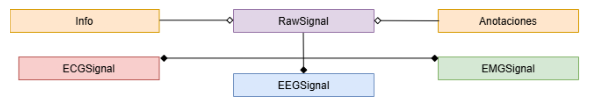

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("uml.png")

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')             
ax.set_anchor('C')         

plt.tight_layout()
plt.show()


<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">El sistema está organizado en torno a la clase RawSignal, que representa una señal fisiológica cruda. Esta clase puede operar sin necesidad de metadatos, aunque en ese caso sus funcionalidades se ven limitadas, ya que no se puede aprovechar completamente la información contextual. RawSignal se relaciona mediante agregación con las clases Info y Anotaciones, que contienen los metadatos de la señal y los eventos asociados, respectivamente. Por otro lado, las clases especializadas EEGSignal, ECGSignal y EMGSignal dependen de RawSignal, ya que reciben una instancia de esta clase como parámetro. A partir de esa instancia acceden a los datos de la señal y a sus atributos asociados, como la frecuencia de muestreo o las anotaciones. Este diseño permite separar la representación genérica de una señal cruda del procesamiento específico según el tipo de señal, favoreciendo la modularidad, la reutilización de código y la extensibilidad del sistema.</div>

<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">5. Clases Principales</h1>

<h1 style="font-family: 'Times New Roman'; font-size: 20px;">5.1 Info</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">

La clase `Info` fue diseñada para almacenar metadatos relevantes asociados a un registro fisiológico, como una señal EEG, ECG o EMG. Su rol es mantener organizada la información contextual de cada señal, como el nombre y tipo de canales, frecuencia de muestreo, detalles del sujeto, del experimento, y más.

Se comporta como un diccionario, permitiendo acceder a sus claves con operadores como `[]` e `in`, e incluye métodos útiles para exploración, modificación y visualización de sus contenidos.

</div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.1.1 Atributos principales </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li> ch_names: lista con los nombres de los canales (ej. `["C3", "Cz", "C4"]`)</li>
      <li> ch_types: tipo de cada canal (ej. `'eeg'`, `'ecg'`, etc.)</li>
      <li> bads: lista de canales marcados como malos</li>
      <li> sfreq: frecuencia de muestreo (Hz)</li>
      <li> description: descripción del experimento</li>
      <li> experimenter: nombre del experimentador</li>
      <li> subject_info: diccionario con información del sujeto (edad, sexo, etc.)</li></div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.1.2 Métodos implementados </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>__contains__(key): permite usar `'key' in info`</li>
      <li>__getitem__(key): accede a un valor por su clave (`info["sfreq"]`)</li>
      <li>__len__(): cantidad de claves almacenadas</li>
      <li>get(key): alternativa segura a `[]`</li>
      <li>keys() / items() / values(): retorna claves, pares clave-valor o valores</li>
      <li>rename_channels(mapping): renombra los canales si existen y no hay duplicados</li>
      <li>pretty(): devuelve la información en formato de tabla con `pandas.DataFrame`</li></div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.1.3 Ejemplo de uso </h1>

In [2]:
from Info import Info

info = Info(
    ch_names=["C3", "Cz", "C4"],
    ch_types="eeg",
    bads=["Cz"],
    sfreq=512,
    description="Registro EEG para análisis de patrones ERD/ERS",
    experimenter=" Julia Iturriaga y Magali Pereyra",
    subject_info={"edad": 29, "sexo": "F"}
)

print(info["sfreq"])           # 512
print("description" in info)   # True
info.rename_channels({"C3": "F3", "Cz": "Fz"})  
print(info.ch_names)           # ['F3', 'Fz', 'C4']
print(info.get("description")) # "Registro de EEG para análisis de patrones ERDS"
print(len(info))               # 7
print(info.keys())             # ['ch_names', 'sfreq', 'description', 'experimenter', 'subject_info', 'bads', 'ch_types']
info.pretty()                  # muestra la tabla


512
True
Canales renombrados exitosamente. Los canales ahora son: ['F3', 'Fz', 'C4']
['F3', 'Fz', 'C4']
Registro EEG para análisis de patrones ERD/ERS
7
dict_keys(['ch_names', 'sfreq', 'description', 'experimenter', 'subject_info', 'bads', 'ch_types'])


,Clave,Valor
0,ch_names,"[F3, Fz, C4]"
1,sfreq,512
2,description,Registro EEG para análisis de patrones ERD/ERS
3,experimenter,Julia Iturriaga y Magali Pereyra
4,subject_info,"{'edad': 29, 'sexo': 'F'}"
5,bads,[Cz]
6,ch_types,"[eeg, eeg, eeg]"


<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">Este objeto es esencial para construir cualquier instancia de RawSignal o sus clases derivadas, aportando los metadatos necesarios para el procesamiento y análisis correcto de la señal.</div>

<h1 style="font-family: 'Times New Roman'; font-size: 20px;">5.2 Anotaciones</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `Anotaciones` permite almacenar y gestionar eventos asociados a un registro fisiológico (por ejemplo, estímulos presentados durante una adquisición EEG o marcadores en un experimento). Estos eventos son fundamentales para la segmentación, análisis por condiciones o visualización contextual de la señal.

Internamente, utiliza un objeto `DataFrame` de **Pandas** con tres columnas principales:

- `onset`: instante de inicio del evento (en segundos o muestras).
- `duration`: duración del evento.
- `description`: etiqueta descriptiva del evento.

Esta clase brinda métodos para agregar, eliminar, buscar, guardar y cargar anotaciones de manera flexible. </div>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> Esta clase es útil para marcar momentos clave dentro de las señales, facilitando el análisis por condiciones o la visualización segmentada. Se integra directamente con la clase RawSignal, permitiendo representar los eventos en los gráficos si se desea, y proporciona una forma práctica de importar/exportar datos de eventos entre sesiones.</div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.2.1 Métodos implementados </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li> add(onset, duration, description): agrega una nueva anotación si no hay una con la misma descripción.
      <li> remove(description): elimina todas las anotaciones que coincidan con la descripción.
      <li> get_anotations(description=None): devuelve todas las anotaciones o solo aquellas que coincidan con una descripción específica.
      <li> find(description): búsqueda exacta de eventos por descripción.
      <li> load(filename): carga anotaciones desde un archivo `.csv`.
      <li> __str__(): devuelve el contenido como string para impresión.  </li> </div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.2.2 Ejemplo de uso </h1>

In [3]:
from Anotations import Anotaciones

anot = Anotaciones()

anot.add(onset=0.0, duration=2.0, description="Inicio")
anot.add(onset=5.0, duration=3.0, description="Estimulo_A")

print(anot.get_anotations())


   onset  duration description
0    0.0       2.0      Inicio
1    5.0       3.0  Estimulo_A


c:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\Anotations.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.anotations = pd.concat([self.anotations, nueva_anotacion], ignore_index=True)


In [4]:
# Buscar una anotación
print(anot.find("Estimulo_A"))

# Eliminar una anotación
anot.remove("Inicio")

print(anot.find("Inicio")) #esta vacío


   onset  duration description
1    5.0       3.0  Estimulo_A
Empty DataFrame
Columns: [onset, duration, description]
Index: []


In [5]:

# Guardar anotaciones en archivo
anot.save("eventos.csv")

# Cargar anotaciones desde archivo
anot.load(r"..\archivos_generados\eventos.csv")

<h1 style="font-family: 'Times New Roman'; font-size: 20px;">5.3 Raw Signal</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `RawSignal` es el núcleo del sistema, encargada de representar, procesar y manipular señales fisiológicas crudas como EEG, ECG o EMG. Integra metadatos (`Info`) y eventos (`Anotaciones`) para trabajar de forma contextualizada con los datos.

Fue diseñada para manejar señales multicanal almacenadas como matrices NumPy, donde cada fila representa un canal y cada columna una muestra temporal. Su implementación modular permite recortes, filtrado, selección de canales, visualización y estadísticas descriptivas. </div>


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.3.1 Atributos principales</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>data: array NumPy con forma (n_canales, n_muestras)</li>
      <li>sfreq: frecuencia de muestreo en Hz</li>
      <li>info: objeto Info con metadatos</li>
      <li>first_samp: índice de la primera muestra considerada</li>
      <li>anotaciones: objeto Anotaciones con eventos asociados </li> </div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.3.2 Métodos implementados</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>get_data(): extrae porciones de la señal con selección de canales y tiempo.
      <li>drop_channels(): elimina uno o más canales y devuelve un nuevo objeto.
      <li>crop(): recorta la señal en un intervalo de tiempo, ajustando las anotaciones.
      <li>cut_before_event(): recorta la señal para que comience antes del primer evento anotado.
      <li>pick(): selecciona canales específicos por nombre o índice.
      <li>describe(): genera estadísticas básicas de cada canal.
      <li>filter(): aplica filtro pasabanda y notch con MNE.
      <li>plot(): visualiza la señal con la herramienta de MNE.
      <li>set_anotaciones(): asocia un nuevo objeto de tipo `Anotaciones`.
      <li>__getitem__(): permite acceder a los datos usando sintaxis tipo array.
      <li>__repr__(): muestra información resumida del objeto.

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.3.3 Integración con otras clases</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">

Aunque la clase RawSignal puede funcionar parcialmente sin las instancias de  `Info` y `Anotaciones`, su uso completo y contextualizado requiere de ellos. La instancia Info permite trabajar con metadatos como los nombres y tipos de canales, mientras que Anotaciones permite asociar eventos experimentales a la señal. Al separar estas responsabilidades en clases externas, se promueve la reutilización y la flexibilidad en el diseño. </div>


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.3.4 Ejemplo de uso</h1>


In [6]:
from RawSignal import RawSignal
import numpy as np

In [7]:
# Cargamos las señales

#EEG DATA
eeg_data= np.load(r"..\proyecto\data\eeg\eeg_signal.np")

#EMG DATA
emg_data= np.load(r"..\proyecto\data\emg\emg\emg.npy")

#ECG DATA
ecg_data= np.load(r"..\proyecto\data\ecg\ecg.npy")

# Cambiamos la forma de los array de ECG y EMG, dado que estaban como 1D array
ecg_data= np.reshape(ecg_data,(1,-1))
emg_data= np.reshape(emg_data,(1,-1))

ecg_data=-1*ecg_data #La señal que cargamos esta dada vuelta, por eso la multiplicamos por -1


In [8]:
# Nos aseguramos que todas las señales tengan la forma (n_canales,n_muestras)

print("Forma de la señal de EEG:", eeg_data.shape) # (62,388047)
print("Forma de la señal de EMG:", emg_data.shape) # (1,388971)
print("Forma de la señal de ECG:", ecg_data.shape) # (1,388971)

Forma de la señal de EEG: (62, 388047)
Forma de la señal de EMG: (1, 388971)
Forma de la señal de ECG: (1, 388971)


In [9]:
# Creamos objetos info y anotaciones para el correcto funcionamiento de RawSignal

sfreq = 512.0 # Frecuencia de muestreo
ch_names_eeg = ['FP1', 'FPz', 'FP2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz',
            'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6',
            'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3',
            'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2',
            'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'F9', 'F10'] #Nombre de canales de EEG

# INFO  Y ANOTACIONES EEG
info_eeg = Info(ch_names=ch_names_eeg, sfreq=sfreq, ch_types= "EEG")
anotaciones_eeg= Anotaciones()

#INFO Y ANOTACIONES ECG
info_ecg= Info(ch_names=["A1"],ch_types="ECG",sfreq=sfreq)
anotaciones_ecg= Anotaciones()

#INFO Y ANOTACIONES EMG
info_emg= Info(ch_types="EMG",sfreq=sfreq)
anotaciones_emg= Anotaciones()

#USAMOS EL MÉTODO .LOAD() PARA CARGAR LOS EVENTOS A ANOTACIONES
anotaciones_eeg.load("..\proyecto\data\eeg\eventos_ejemplo.csv")
anotaciones_ecg.load(r"..\proyecto\data\ecg\datos_convertidos_ecg.csv")
anotaciones_emg.load(r"..\proyecto\data\emg\emg\datos_convertidos_emg.csv")

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2912\1816903228.py:23: SyntaxWarning: invalid escape sequence '\p'
  anotaciones_eeg.load("..\proyecto\data\eeg\eventos_ejemplo.csv")


In [10]:
#Crear instancias de RawSignal para cada señal

#RAW EEG
raw_eeg=RawSignal(data=eeg_data,sfreq=sfreq,info=info_eeg,anotaciones=anotaciones_eeg)

#RAW ECG
raw_ecg=RawSignal(data=ecg_data,sfreq=sfreq,info=info_ecg,anotaciones=anotaciones_ecg)

#RAW EMG
raw_emg=RawSignal(data=emg_data,sfreq=sfreq,info=info_emg,anotaciones=anotaciones_emg)

In [11]:
#Probando get_data()

segmento_eeg= raw_eeg.get_data(start=3, stop=7)  
print(segmento_eeg.shape)  # debería ser (62, muestras entre 3s y 7s → 4*512 = 2048)
segmento_emg=raw_emg.get_data(start=2,stop=10)
print(segmento_emg.shape) # debería ser (1, muestras entre 2s y 10s → 8*512 = 4096)
segmento_ecg=raw_ecg.get_data(start=7,stop=9)
print(segmento_ecg.shape) # debería ser (1, muestras entre 7s y 9s → 2*512 = 1024)


(62, 2048)
(1, 4096)
(1, 1024)


In [12]:
#Probando drop_channels()

new_signal_eeg = raw_eeg.drop_channels(['AF3'])
print(new_signal_eeg.data.shape) # shape -> (61, 388047)
print("Canales restantes:", new_signal_eeg.info['ch_names'])

(61, 388047)
Canales restantes: ['FP1', 'FPz', 'FP2', 'AF7', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'F9', 'F10']


In [13]:
# Probando crop()

eeg_cropped = raw_eeg.crop(tin= 40,tf=100)
print(f"Shape eeg_cropped {eeg_cropped.data.shape}") # debería ser (62, 60*512=30720)
print(eeg_cropped.anotaciones)

emg_cropped= raw_emg.crop(tin= 10, tf= 90)
print(f"Shape emg_cropped {emg_cropped.data.shape}") #deberia ser (1, 40960)
print(emg_cropped.anotaciones)

ecg_cropped= raw_ecg.crop(tin=50,tf=60)
print(f"Shape ecg_cropped {ecg_cropped.data.shape}") # deberia ser (1, 5120)
print(ecg_cropped.anotaciones)

Shape eeg_cropped (62, 30720)
       onset  duration description
0  14.048828         5     DERECHA
1  30.482422         5     DERECHA
2  48.632812         5     DERECHA
Shape emg_cropped (1, 40960)
       onset  duration  description
0  26.277344         5            2
1  42.792969         5            1
2  60.193359         5            1
3  76.576172         5            1
Shape ecg_cropped (1, 5120)
      onset  duration  description
0  2.792969         5            1


In [14]:
# Probando describe()

raw_eeg.describe()


,name,type,min,Q1,mediana,Q3,max
0,FP1,EEG,-8707.160156,-7.417814,0.036089,7.569032,24475.962891
1,FPz,EEG,-7117.736328,-4.250395,0.011847,4.314002,20024.503906
2,FP2,EEG,-7099.595703,-5.601849,0.064424,5.865489,20075.072266
3,AF7,EEG,-12618.859375,-12.632099,0.535278,13.503281,35234.156250
4,AF3,EEG,-9001.718750,-5.207978,0.015482,5.290213,25327.796875
...,...,...,...,...,...,...,...
57,O1,EEG,-10155.270508,-5.439233,-0.070252,5.353601,28699.048828
58,Oz,EEG,-9585.705078,-5.124704,-0.090171,5.043318,27103.341797
59,O2,EEG,-9334.907227,-5.106302,-0.058752,5.035936,26394.333984
60,F9,EEG,-7149.172852,-5.908332,-0.041200,5.871842,20113.488281


In [15]:
raw_emg.describe()


,name,type,min,Q1,mediana,Q3,max
0,Canal 0,desconocido,-3295.875,-13.982178,-0.493774,12.191162,10235.082031


In [16]:
raw_ecg.describe()

,name,type,min,Q1,mediana,Q3,max
0,A1,ECG,-1799.060181,-24.976276,-8.30687,11.635314,5108.72168


In [17]:
# Probando filter()
raw_eeg_filtrado = raw_eeg.filter(l_freq=1.0, h_freq=40.0, notch_freq=50., order=4)
raw_ecg_filtrado= raw_ecg.filter(l_freq=5,h_freq=36)
raw_emg_filtrado= raw_emg.filter(l_freq=5,h_freq=48)


Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB



In [18]:
# Probando cut_before_event()

eeg_cut=raw_eeg_filtrado.cut_before_event()
emg_cut=raw_emg_filtrado.cut_before_event()
ecg_cut=raw_ecg_filtrado.cut_before_event()

In [19]:
# Probando remove_segment() 
eeg_cut= eeg_cut.remove_segment(t_start=300,t_stop=400)
emg_cut= emg_cut.remove_segment(t_start=300,t_stop=400)



Creating RawArray with float64 data, n_channels=62, n_times=320182
    Range : 0 ... 320181 =      0.000 ...   625.354 secs
Ready.
Using matplotlib as 2D backend.


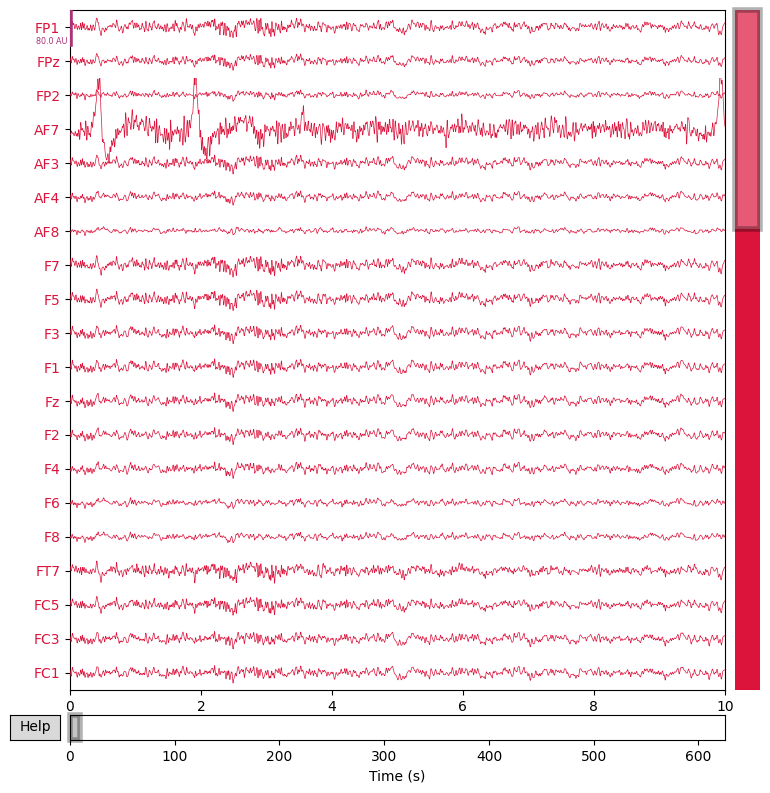

Creating RawArray with float64 data, n_channels=1, n_times=321757
    Range : 0 ... 321756 =      0.000 ...   628.430 secs
Ready.


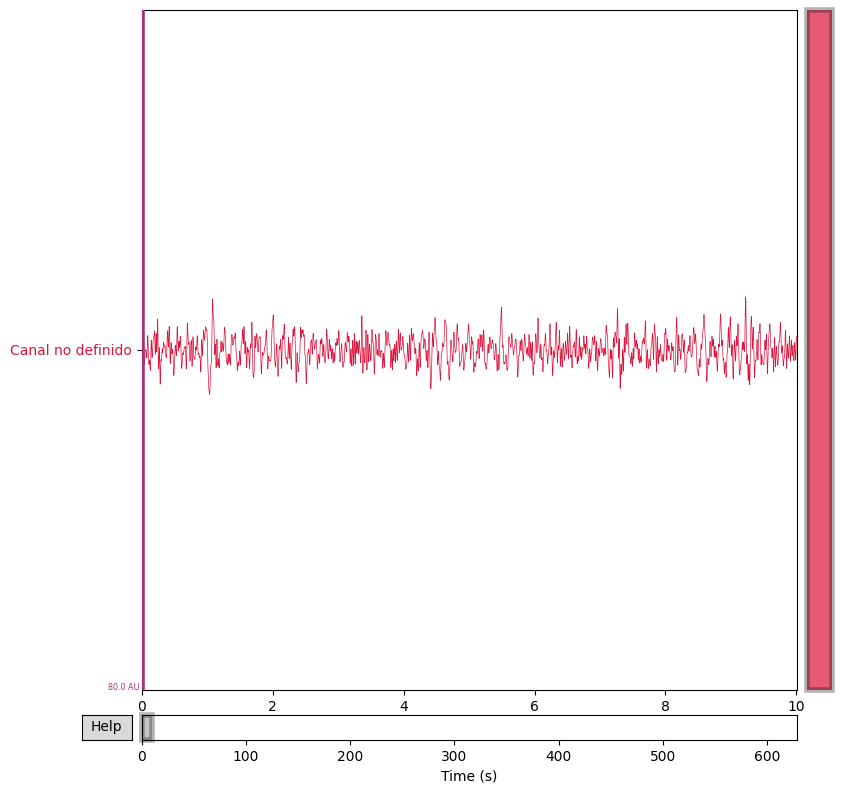

Creating RawArray with float64 data, n_channels=1, n_times=372957
    Range : 0 ... 372956 =      0.000 ...   728.430 secs
Ready.


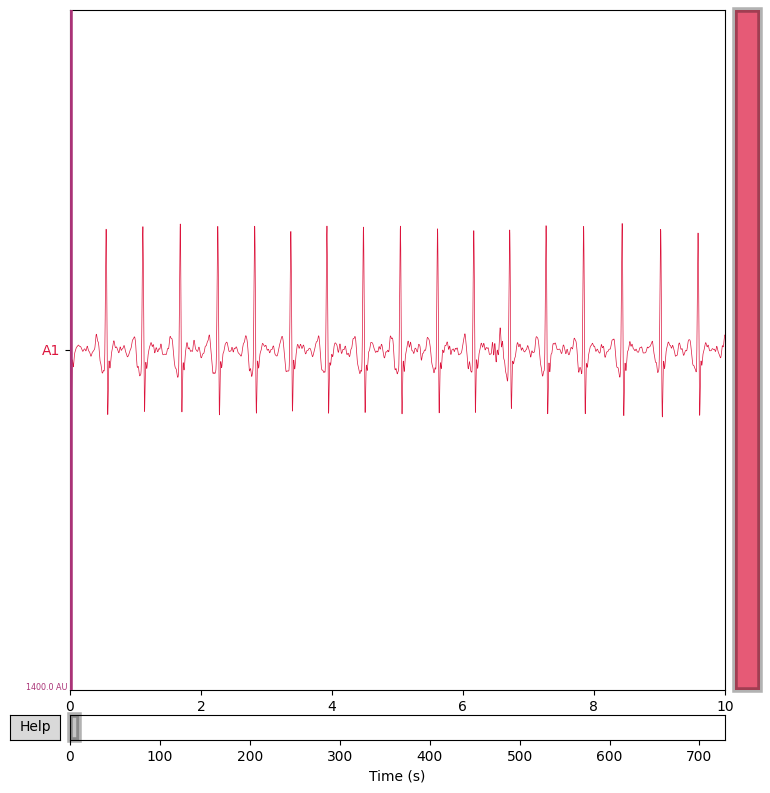

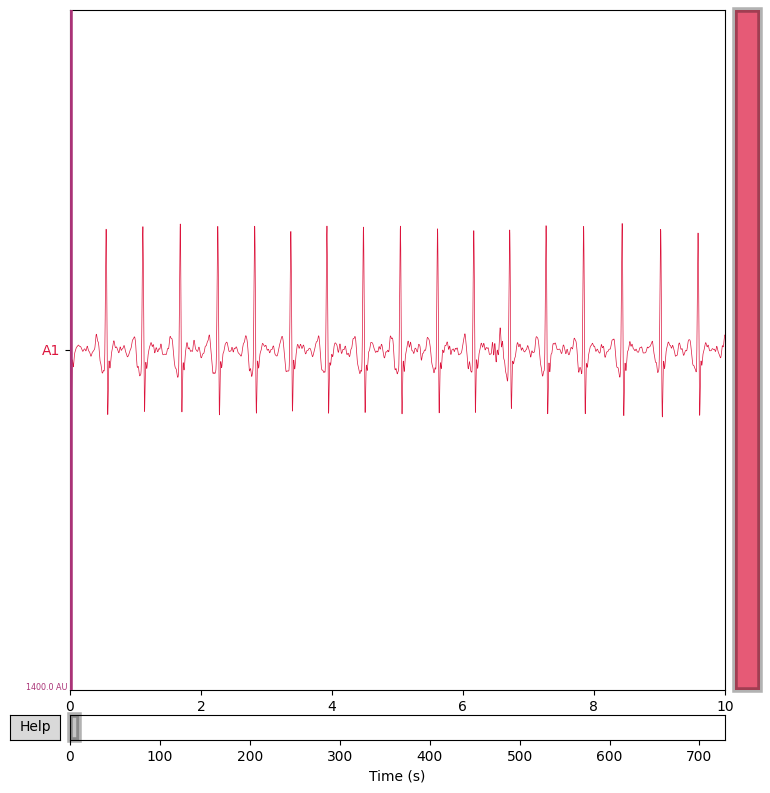

In [20]:
# Probando plot()

eeg_cut.plot()
emg_cut.plot()
ecg_cut.plot(scalings=700)

In [21]:
#Probando pick()

picked_signal_eeg = raw_eeg.pick(["C3","C4"])
print("Canales seleccionados:", picked_signal_eeg.info['ch_names']) #salida esperada: Canales seleccionados: ['C3','C4']


Canales seleccionados: ['C3', 'C4']


<h1 style="font-family: 'Times New Roman'; font-size: 20px;">5.4 ECGSignal</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `ECGSignal` está orientada al análisis específico de señales electrocardiográficas (ECG), permitiendo detectar automáticamente los picos R, calcular la frecuencia cardíaca y visualizar los resultados tanto en el dominio temporal como en el tiempo-frecuencia.

Se construye a partir de un objeto RawSignal y permite seleccionar uno o más canales mediante índices o nombres. Su estructura flexible facilita el trabajo con señales multicanal y diferentes configuraciones de entrada.

Además de la detección de eventos, ofrece herramientas gráficas para resaltar picos relevantes y representar la distribución espectral mediante espectrogramas.</div>


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.4.1 Atributos principales</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>signal: objeto RawSignal que contiene la señal fisiológica original y sus metadatos.</li>
      <li>sfreq: frecuencia de muestreo en Hz</li>
      <li>picos_r: lista de arrays de NumPy que contienen los índices de los picos R detectados por canal.</li>
      <li>frec_cardiaca: lista de valores numéricos que representan la frecuencia cardíaca promedio (en latidos por minuto) para cada canal. </li> </div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.4.2 Métodos implementados</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
      <li>detectar_picos_R(): detecta los picos R en las señales ECG seleccionadas.
      <li>calcular_frecuencia_cardiaca(): calcula la frecuencia cardíaca media para cada canal a partir de los intervalos RR.
      <li>graficar_señal_con_picos(): grafica la señal ECG en un intervalo de tiempo junto con los picos R detectados.
      <li>calcular_tfr(): genera un espectrograma (análisis tiempo-frecuencia) para el canal especificado.



<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.4.3 Integración con otras clases</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `ECGSignal` está diseñada para el análisis específico de señales electrocardiográficas (ECG) a partir de datos fisiológicos crudos provistos por la clase `RawSignal`. Esta integración permite aplicar técnicas de procesamiento sobre señales multicanal y extraer información clínica relevante como la frecuencia cardíaca o la localización de picos R.

La integración con `RawSignal` se realiza directamente a través del constructor, que recibe un objeto de dicha clase para acceder a los datos de la señal (data), la frecuencia de muestreo (sfreq) y los nombres de los canales (info.ch_names). De este modo, `RawSignal` actúa como una capa funcional que trabaja sobre los datos de entrada sin modificarlos, lo cual permite preservar la señal original y reutilizarla en otros análisis.
. </div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.4.4 Ejemplo de uso </h1>

In [23]:
## Importamos ECGSignal
from ECGSignal import ECGSignal

In [24]:
## Crear objeto ECGSignal

#Para esto necesitamos, el objeto RawSignal de la señal de ECG
#Vamos a usar el objeto RawSigal ecg_cut ya que contiene la señal filtrada y recortada

señal_ecg= ECGSignal(signal=ecg_cut)

Creating RawArray with float64 data, n_channels=1, n_times=372957
    Range : 0 ... 372956 =      0.000 ...   728.430 secs
Ready.


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método detectar_picos_R() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Uno de los análisis que le podemos hacer a una señal de ECG es la detección de los picos R, que son los puntos más altos del complejo QRS y representan la despolarización de los ventrículos. Detectar estos picos es fundamental porque nos permite calcular la frecuencia cardíaca y analizar el ritmo del corazón. Para esto podemos usar el método detectar_picos_R(), que retorna una lista con arrays de los índices de los picos R detectados por canal. </h1>

In [25]:
picos_ecg=señal_ecg.detectar_picos_R()
for pico in picos_ecg:
    print(pico.shape)


(962,)


<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Como se mencionó el método devuelve una lista de arrays, uno por canal; cada array tiene la cantidad de picos detectados (en este caso 712) y cada elemento indica en qué muestra ocurrió cada pico R
 </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método graficar_señal_con_picos() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Una utilidad muy práctica de detectar los picos R en una señal de ECG es graficarla marcando esos picos, ya que permite visualizar claramente dónde ocurren los latidos y verificar si la detección fue correcta o si hay artefactos o errores en el procesamiento. Para esto vamos a usar el metodo graficar_señal_con_picos()</h1>

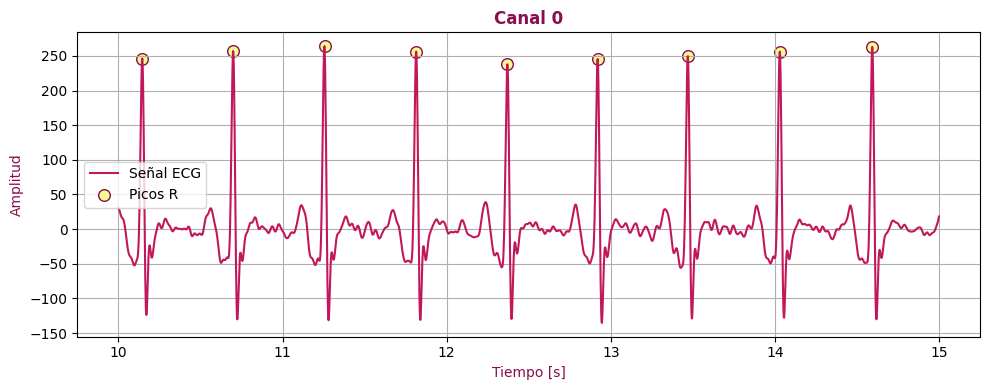

In [26]:
señal_ecg.graficar_señal_con_picos(t_inicio=10,t_fin=15)

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método calcular_frecuencia_cardiaca() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Otra analisis útil que se puede hacer después de detectar los picos R es calcular la frecuencia cardíaca, ya que al medir el tiempo entre picos consecutivos (intervalos RR) se puede estimar cuántos latidos por minuto tiene la persona y analizar la variabilidad de la frecuencia cardíaca para evaluar su estado fisiológico.</h1>

In [27]:
fc=señal_ecg.calcular_frecuencia_cardiaca()
print(f"La frecuencia cardiaca es {fc[0]} lpm")

La frecuencia cardiaca es 79.25666805374713 lpm


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método calcular_tfr() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Por último, una representación muy útil es la gráfica tiempo-frecuencia de la señal de ECG, que permite visualizar cómo se distribuyen las componentes de frecuencia a lo largo del tiempo, facilitando la identificación de cambios en el ritmo cardíaco o la presencia de artefactos y características específicas de la señal.</h1>

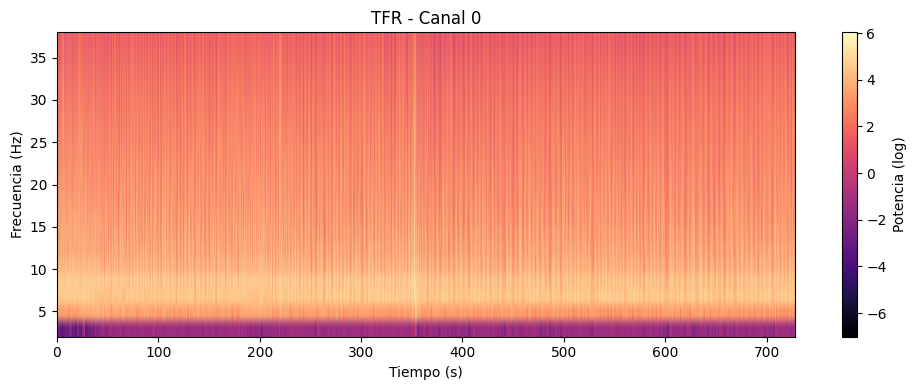

(array([[6.69501782e+03, 6.69886662e+03, 6.70239066e+03, ...,
         3.73791403e+02, 3.73877475e+02, 3.73945234e+02],
        [2.18699799e+04, 2.20043012e+04, 2.21357864e+04, ...,
         2.37742355e+03, 2.35119135e+03, 2.32507917e+03],
        [2.57542018e+04, 2.59736930e+04, 2.61840962e+04, ...,
         6.39804187e+03, 6.29235011e+03, 6.18689556e+03],
        ...,
        [4.83160838e+04, 5.09939500e+04, 5.31674209e+04, ...,
         8.05525976e+01, 7.16703105e+01, 6.34126589e+01],
        [4.44807750e+04, 4.68985773e+04, 4.87678720e+04, ...,
         6.88135245e+01, 6.14248345e+01, 5.44363059e+01],
        [4.06479052e+04, 4.27619645e+04, 4.42851570e+04, ...,
         5.66535090e+01, 5.07777342e+01, 4.51122023e+01]],
       shape=(19, 372957)),
 array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
        7.28425781e+02, 7.28427734e+02, 7.28429688e+02], shape=(372957,)))

In [28]:
señal_ecg.calcular_tfr()

<h1 style="font-family: 'Times New Roman'; font-size: 20px;">5.5 EMGSignal </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `EMGSignal` está enfocada en el análisis y visualización de señales de electromiografía (EMG), a partir de datos fisiológicos crudos proporcionados por la clase `RawSignal`. Permite identificar activaciones musculares en función de un umbral configurable y aplicar técnicas de análisis como transformadas de Hilbert y espectrogramas.

Está diseñada para trabajar con señales multicanal, facilitando la selección de uno o varios canales de interés. Entre sus principales funcionalidades se encuentra la detección automática de eventos musculares (activaciones) mediante el análisis del valor absoluto de la señal, la visualización de la señal con su umbral superpuesto, y el estudio de su contenido espectral en el dominio tiempo-frecuencia.

Además, proporciona herramientas para representar la envolvente de la señal, lo que permite analizar la dinámica de las activaciones de manera más suave y visualmente clara. 
 </div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.5.1 Atributos principales </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
  <li>raw: objeto RawSignal que contiene la señal EMG original y sus metadatos.</li>
  <li>umbral: valor numérico que indica el umbral para detectar activaciones musculares.</li>
  <li>fm: frecuencia de muestreo en Hz, tomada de raw_signal.sfreq.</li>
  <li>signals: lista de arreglos NumPy con las señales EMG de los canales seleccionados.</li>
  <li>indices_temporales: lista de arrays de NumPy que contienen los índices donde se detectan activaciones musculares (señal supera el umbral) por canal.</li>
</div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.5.2 Metodos implementados </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
  <li>detectar_activaciones(): detecta las activaciones musculares comparando el valor absoluto de la señal con el umbral y devuelve los índices donde se superó el umbral en cada canal.</li>
  <li>graficar_emg_con_umbral(): grafica la señal EMG junto con el umbral y las activaciones detectadas en un intervalo de tiempo definido para uno o varios canales.</li>
  <li>graficar_tiempo_frecuencia(): genera el espectrograma (representación tiempo-frecuencia) de un canal específico de la señal EMG.</li>
  <li>graficar_transformada_hilbert(): grafica la señal EMG y su envolvente calculada mediante la transformada de Hilbert para uno o varios canales en un intervalo de tiempo especificado.</li>
</div>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.5.3 Integracion con otras clases </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `EMGSignal` está diseñada para el análisis específico de señales electromiográficas (EMG) a partir de datos fisiológicos crudos provistos por la clase `RawSignal`. Esta integración permite aplicar técnicas de procesamiento sobre señales multicanal y extraer información relevante como la detección de activaciones musculares y el análisis de su contenido espectral.

La integración con `RawSignal` se realiza directamente a través del constructor, que recibe un objeto de dicha clase para acceder a los datos de la señal (data), la frecuencia de muestreo (sfreq) y los nombres de los canales (info.ch_names). De este modo, `RawSignal` actúa como una capa funcional que trabaja sobre los datos de entrada sin modificarlos, lo cual permite preservar la señal original y reutilizarla en otros análisis.

</div>



<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.5.4 Ejemplo de uso </h1>

In [29]:
## Importamos ECGSignal
from EMGSignal import EMGSignal

In [30]:
## Crear objeto EMGSignal

#Para esto necesitamos, el objeto RawSignal de la señal de EMG
#Vamos a usar el objeto RawSigal emg_cut ya que contiene la señal filtrada y recortada

señal_emg= EMGSignal(signal=emg_cut,umbral=20)

Creating RawArray with float64 data, n_channels=1, n_times=321757
    Range : 0 ... 321756 =      0.000 ...   628.430 secs
Ready.


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método detectar_activaciones() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Dentro de la clase para el análisis de señales de EMG, uno de los métodos principales es detectar_activaciones. Este método es fundamental para identificar los momentos en que el músculo está activo, ya que detecta todos los segmentos de la señal que superan un umbral. Este método es flexible, ya que el umbral lo asigna el usuario y puede ajustarse según las características específicas de la señal o el objetivo del análisis.</h1>

In [31]:
activaciones=señal_emg.detectar_activaciones()
for i, indices in enumerate(activaciones):
    print(f"Canal {i}: número de activaciones: {len(indices)}")


Canal 0: número de activaciones: 934


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método graficar_emg_con_umbral() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Este método es útil porque permite visualizar la señal EMG junto con el umbral definido y las activaciones detectadas, facilitando la interpretación de cuándo y en qué momentos el músculo está activo. Además, puede mostrar marcas de eventos importantes (onset) para enriquecer el análisis visual. </h1>

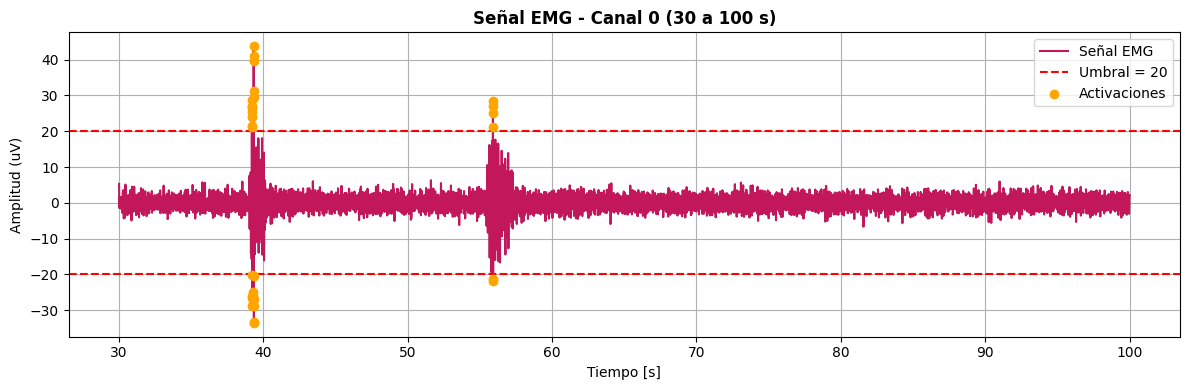

In [32]:
señal_emg.graficar_emg_con_umbral(t_inicio=30 ,t_fin=100)


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método calcular_tfr() </h1>


<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Este método es relevante porque permite analizar la señal EMG en el dominio tiempo-frecuencia usando wavelets Morlet, identificando cómo varía la potencia en diferentes bandas de frecuencia a lo largo del tiempo. Esto es clave para detectar patrones de activación muscular y caracterizar la señal más allá del análisis puramente temporal. </h1>

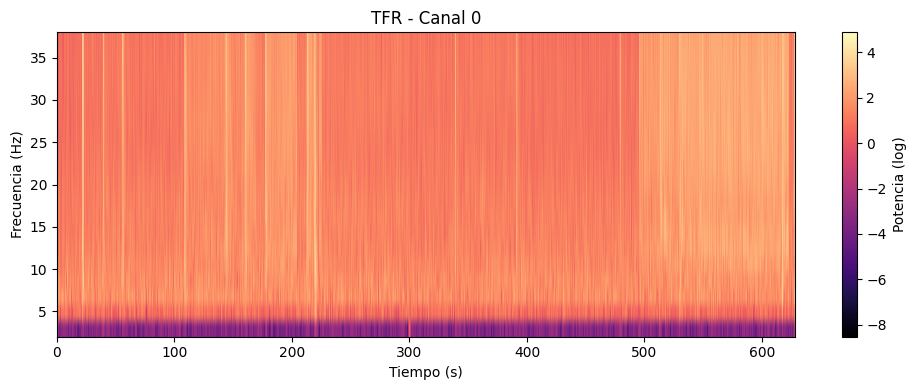

(array([[ 1.42795025,  1.42961353,  1.43120817, ...,  2.78041338,
          2.78276632,  2.78497317],
        [17.50546106, 17.81557199, 18.12820979, ..., 23.84620014,
         23.68568129, 23.52215834],
        [ 8.81151599,  9.19782494,  9.59732719, ..., 31.4634321 ,
         30.99346684, 30.51572201],
        ...,
        [ 0.25244167,  0.36896118,  0.5298943 , ...,  2.16773362,
          2.15489038,  2.10534148],
        [ 0.05512863,  0.12170867,  0.22853116, ...,  2.1694789 ,
          2.15045756,  2.09000061],
        [ 0.05092559,  0.09550901,  0.17586678, ...,  2.24985825,
          2.20081933,  2.1103217 ]], shape=(19, 321757)),
 array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
        6.28425781e+02, 6.28427734e+02, 6.28429688e+02], shape=(321757,)))

In [33]:
señal_emg.calcular_tfr(canal=0)

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método calcular_hilbert() </h1>


<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Este método es relevante porque permite calcular la transformada de Hilbert de la señal EMG, obteniendo su magnitud (envolvente) y fase, lo cual es útil para analizar la modulación de amplitud, detectar activaciones musculares con mayor precisión y estudiar las características de la señal en el dominio complejo.
</h1>

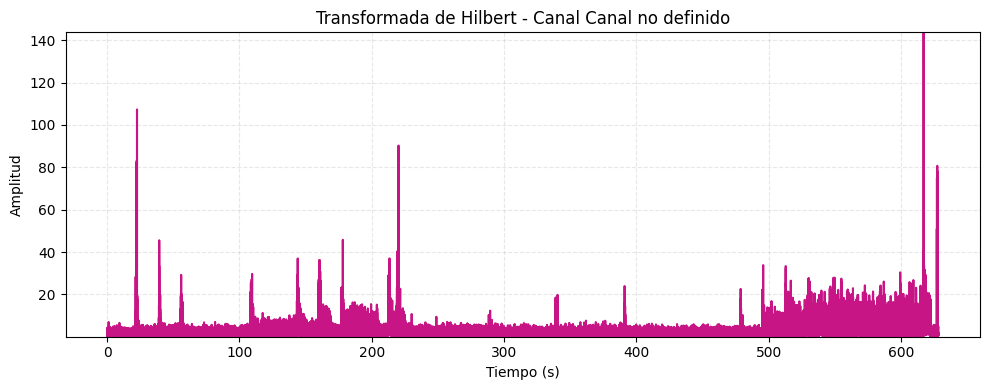

In [34]:
señal_emg.calcular_hilbert(envelope=True)

<h1 style="font-family: 'Times New Roman'; font-size: 20px;">5.6 EEGSignal</h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;"> 

La clase `EEGSignal` está diseñada para el análisis específico de señales electroencefalográficas (EEG), incorporando herramientas comúnmente utilizadas en neurociencia, como el cambio de referencia (promedio, canal o laplaciana), el cálculo del espectro de Fourier, la transformada de Hilbert y la representación tiempo-frecuencia mediante ondas de Morlet.

Se construye a partir de un objeto `RawSignal`, del cual hereda los datos de la señal y su estructura interna. A partir de esta base, permite aplicar transformaciones y análisis propios del EEG sin modificar la señal original.

La clase también facilita la visualización gráfica de los resultados, tanto en el dominio de la frecuencia como en el tiempo, lo que la convierte en una herramienta útil para la exploración e interpretación de registros electroencefalográficos.</div>


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.6.1 Atributos principales </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
  <li>signal: objeto RawSignal que contiene la señal EEG original junto con su información contextual.</li>
  <li>_raw_mne: objeto RawArray de MNE construido a partir de la señal cruda, utilizado para aplicar métodos avanzados de análisis.</li>
  <li>sfreq: frecuencia de muestreo en Hz, extraída desde la instancia de RawSignal.</li>
  <li>montage: montaje espacial de electrodos utilizado para el análisis topográfico; puede ser personalizado o nulo.</li>
  <li>referencia: tipo de referencia adoptada por la señal EEG ('promedio', 'canal' o 'laplaciano').</li>
  <li>canal: nombre del canal de referencia si se utiliza el modo de referencia por canal; en otros casos, es None.</li>
</div>


<h1 style="font-family: 'Times New Roman'; font-size: 19px;">5.6.1 Métodos implementados </h1>

<div style="text-align: justify; font-family: 'Times New Roman'; font-size: 18px;">
  <li>change_ref(): cambia la referencia de la señal, devuelve una nueva instancia de EEGSignal.</li>
  <li>aplicar_filtro_laplaciano(): aplica un filtro laplaciano, recibe como parámetro tanto un montaje como un diccionario de vecindad.</li>
  <li>calcular_espectro(): calcula y grafica el espectro de fourier para uno o varios canales.</li>
  <li>calcular_trf: calcula representación tiempo-frecuencia (morlet) para un canal.</li>
  <li>calcular_hilbert():  calcula y grafica la transformada de hilbert y permite devolver magnitud, fase o señal compleja.</li>

</div>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Utilicemos una porción de la señal de EEG para probar el funcionamiento de la clase. </h1>

In [43]:
raw_cropped = raw_eeg_filtrado.crop(50,60) #5 segundos antes y 5 después del segundo evento.

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Instanciamos EEGSignal. </h1>

In [37]:
from EEGSignal import EEGSignal

In [44]:
eeg = EEGSignal(signal = raw_cropped, referencia = "canal", montaje = "ghiamp_montage.sfp")

Creating RawArray with float64 data, n_channels=62, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.


c:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\EEGSignal.py:28: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  self._raw_mne.set_montage(self.montage)


<h1 style="font-family: 'Times New Roman'; font-size: 17px;">
En este caso particular, se dispone del montaje de electrodos. Si no se cuenta con esta información, puede cargarse un diccionario que defina la vecindad entre electrodos. Aunque la clase puede operar sin estos datos, algunos de sus métodos se verán limitados.
</h1>


Creating RawArray with float64 data, n_channels=62, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.


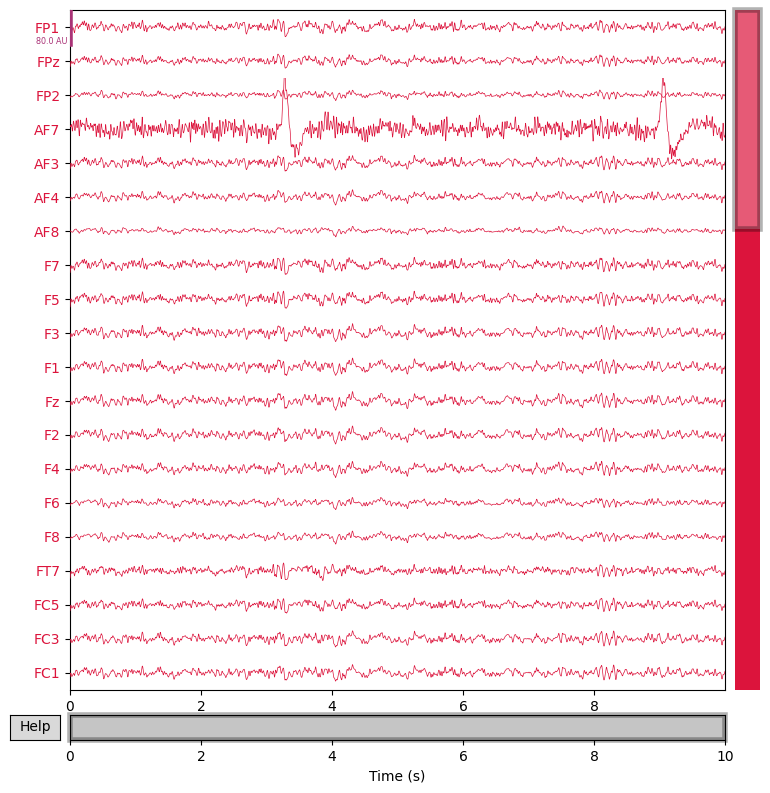

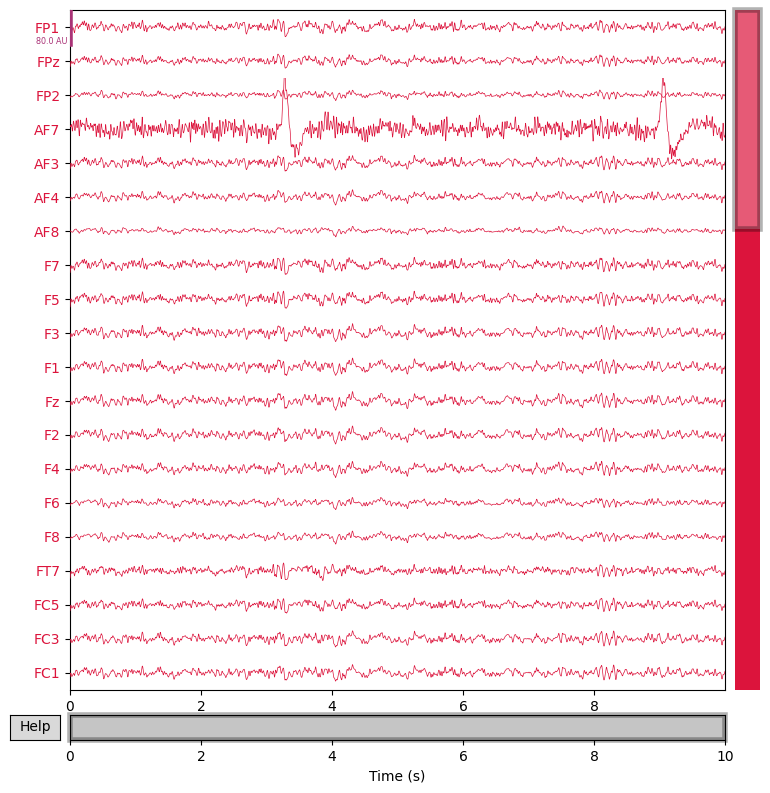

In [46]:
eeg.signal.plot()

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método change_ref() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">El método change_ref es importante porque permite cambiar la referencia de los canales EEG, lo cual impacta directamente en cómo se ven las señales. 
Como las señales EEG son diferencias de potencial, siempre dependen del electrodo tomado como referencia. Si no se elige bien, puede pasar que se oculten patrones relevantes o que aparezcan artefactos que en realidad no están. Cambiar la referencia (por ejemplo, usar la referencia promedio) ayuda a mejorar la calidad de la señal y hace que los análisis posteriores, como filtrado, detección de eventos o cálculo de conectividad, sean más confiables.</h1>



In [49]:
eeg.signal.data

array([[-19.6430876 , -18.49127071, -16.03284685, ...,  -3.31719515,
         -1.68946167,  -0.07564382],
       [-13.85647335, -13.3066508 , -11.84459905, ...,  -1.60305436,
         -0.32109419,   0.94245707],
       [ -6.54996054,  -6.75707299,  -6.50955128, ...,  -0.43213508,
          0.21331621,   0.84590154],
       ...,
       [ -5.72015018,  -4.93860964,  -3.77390487, ...,  -3.08676504,
         -3.08337379,  -3.04800135],
       [-11.91729267, -10.99367639,  -9.40533401, ...,   0.50214194,
          1.65895819,   2.79699751],
       [  6.80431146,   6.20816584,   5.08555021, ...,   3.30107199,
          3.04967749,   2.7529926 ]], shape=(62, 5120))

In [51]:
eeg_prom = eeg.change_ref("promedio") #cambiamos la referencia a promedio

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=62, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Referencia cambiada a 'promedio'.


c:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\EEGSignal.py:28: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  self._raw_mne.set_montage(self.montage)


In [52]:
eeg_prom.signal.data

array([[-12.90775693, -12.95162594, -11.97754739, ...,  -2.77952012,
         -2.25294746,  -1.69534743],
       [ -7.12114268,  -7.76700603,  -7.78929959, ...,  -1.06537934,
         -0.88457998,  -0.67724654],
       [  0.18537013,  -1.21742822,  -2.45425182, ...,   0.10553994,
         -0.35016958,  -0.77380207],
       ...,
       [  1.0151805 ,   0.60103513,   0.28139459, ...,  -2.54909001,
         -3.64685958,  -4.66770496],
       [ -5.181962  ,  -5.45403162,  -5.35003455, ...,   1.03981696,
          1.0954724 ,   1.1772939 ],
       [ 13.53964213,  11.74781061,   9.14084967, ...,   3.83874702,
          2.4861917 ,   1.13328899]], shape=(62, 5120))

In [54]:
eeg_f = eeg.change_ref("laplaciano") #cambiamos la referencia a laplaciano

Fitted sphere radius:         95.0 mm
Origin head coordinates:      -0.0 0.0 -0.2 mm
Origin device coordinates:    -0.0 0.0 -0.2 mm


Creating RawArray with float64 data, n_channels=62, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Referencia cambiada a 'laplaciano'.


c:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\EEGSignal.py:28: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  self._raw_mne.set_montage(self.montage)


In [56]:
eeg_f.signal.data

array([[-10438.74883167,  -8961.83492261,  -6859.07628585, ...,
         -5847.42024123,  -4534.86318302,  -3347.72992354],
       [-17356.2367625 , -16431.27360258, -14216.35502813, ...,
           621.05925284,   1670.64526384,   2373.27485489],
       [ -6974.25078639,  -7041.11427218,  -6512.17631948, ...,
           837.27936984,   1046.66399074,   1110.68066616],
       ...,
       [ -4997.47818522,  -5164.8097797 ,  -5014.64481633, ...,
         -1288.32702866,  -1354.05006225,  -1490.44217053],
       [ -4768.1537527 ,  -5926.74233128,  -6557.46674029, ...,
         -1011.52400074,  -1672.01563864,  -1922.79255841],
       [ -1076.66610643,   -772.16370334,   -613.44512377, ...,
          3328.07809132,   3599.04168696,   3591.49396288]],
      shape=(62, 5120))

In [57]:
eeg_canal= eeg.change_ref("canal","FPz") #cambiamos la referencia a canal

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=62, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Referencia cambiada a 'canal'.


c:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\EEGSignal.py:28: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  self._raw_mne.set_montage(self.montage)


In [ ]:
eeg_canal.signal.data

array([[-5.78661425, -5.18461991, -4.1882478 , ..., -1.71414078,
        -1.36836748, -1.01810089],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.3065128 ,  6.54957781,  5.33504777, ...,  1.17091928,
         0.53441041, -0.09655553],
       ...,
       [ 8.13632317,  8.36804116,  8.07069418, ..., -1.48371067,
        -2.7622796 , -3.99045842],
       [ 1.93918067,  2.31297441,  2.43926504, ...,  2.1051963 ,
         1.98005238,  1.85454044],
       [20.66078481, 19.51481664, 16.93014926, ...,  4.90412635,
         3.37077168,  1.81053553]], shape=(62, 5120))

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método aplicar_filtro_laplaciano() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;"> A diferencia del método change_ref, que solo permite cambiar la referencia a laplaciana si se cargó previamente el montaje de electrodos, el método aplicar_filtro_laplaciano también funciona si se le pasa directamente un diccionario con las vecindades. Esto lo hace más flexible, ya que no depende del montaje para calcular la referencia local, sino que se puede definir manualmente cómo se relaciona cada electrodo con sus vecinos. Así, se puede aplicar el filtro incluso en configuraciones personalizadas o cuando no se tiene el layout completo cargado.</h1>

In [60]:
eeg_laplaciano = eeg.aplicar_filtro_laplaciano()

Fitted sphere radius:         95.0 mm
Origin head coordinates:      -0.0 0.0 -0.2 mm
Origin device coordinates:    -0.0 0.0 -0.2 mm
Creating RawArray with float64 data, n_channels=62, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.


c:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\EEGSignal.py:28: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  self._raw_mne.set_montage(self.montage)


In [64]:
eeg_laplaciano.signal.data

array([[-10438.74883167,  -8961.83492261,  -6859.07628585, ...,
         -5847.42024123,  -4534.86318302,  -3347.72992354],
       [-17356.2367625 , -16431.27360258, -14216.35502813, ...,
           621.05925284,   1670.64526384,   2373.27485489],
       [ -6974.25078639,  -7041.11427218,  -6512.17631948, ...,
           837.27936984,   1046.66399074,   1110.68066616],
       ...,
       [ -4997.47818522,  -5164.8097797 ,  -5014.64481633, ...,
         -1288.32702866,  -1354.05006225,  -1490.44217053],
       [ -4768.1537527 ,  -5926.74233128,  -6557.46674029, ...,
         -1011.52400074,  -1672.01563864,  -1922.79255841],
       [ -1076.66610643,   -772.16370334,   -613.44512377, ...,
          3328.07809132,   3599.04168696,   3591.49396288]],
      shape=(62, 5120))

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Aplicar el filtro laplaciano es útil porque resalta la actividad local en cada canal, eliminando la contribución más global del volumen conductor. Esto mejora la resolución espacial y puede ayudar a detectar con más claridad focos de actividad cortical o eventos específicos en el EEG.</h1>

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método calcular_espectro() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">En el análisis de señales EEG, espectro de Fourier permite pasar del dominio temporal al dominio frecuencial, donde se pueden observar con mayor claridad los componentes rítmicos de la actividad cerebral. Cada banda de frecuencia (delta, theta, alfa, beta, gamma) está relacionada con distintos procesos fisiológicos y estados mentales, por lo que conocer su distribución en la señal aporta información valiosa. Además, este análisis ayuda a identificar patrones que no son tan evidentes en el tiempo, como oscilaciones persistentes o la presencia de artefactos que aparecen en rangos específicos. En resumen, el espectro permite entender mejor la dinámica del cerebro y es la base de muchos análisis posteriores, desde estudios clínicos hasta aplicaciones en interfaces cerebro-computadora.</h1>

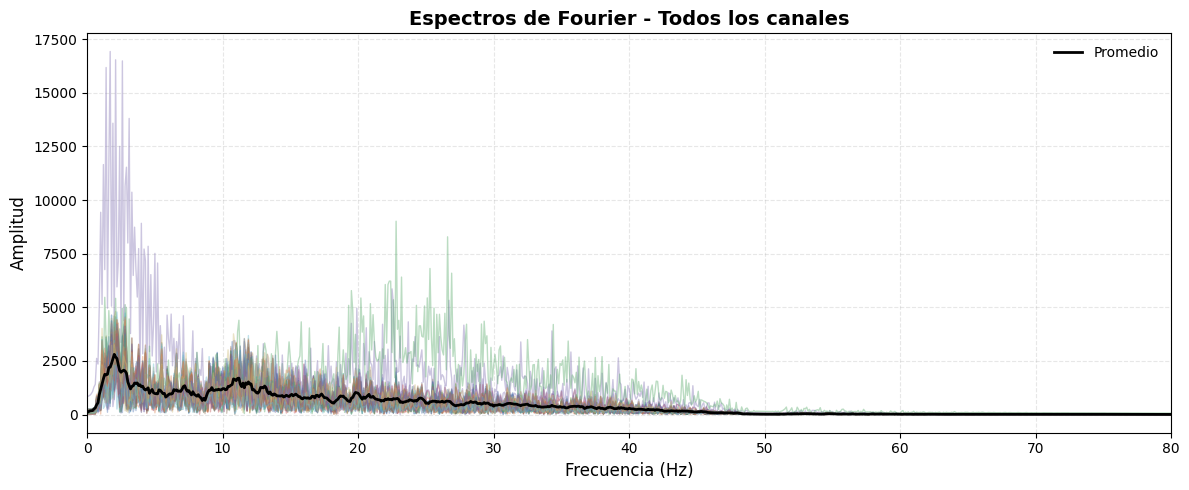

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

In [76]:
eeg.calcular_espectro()

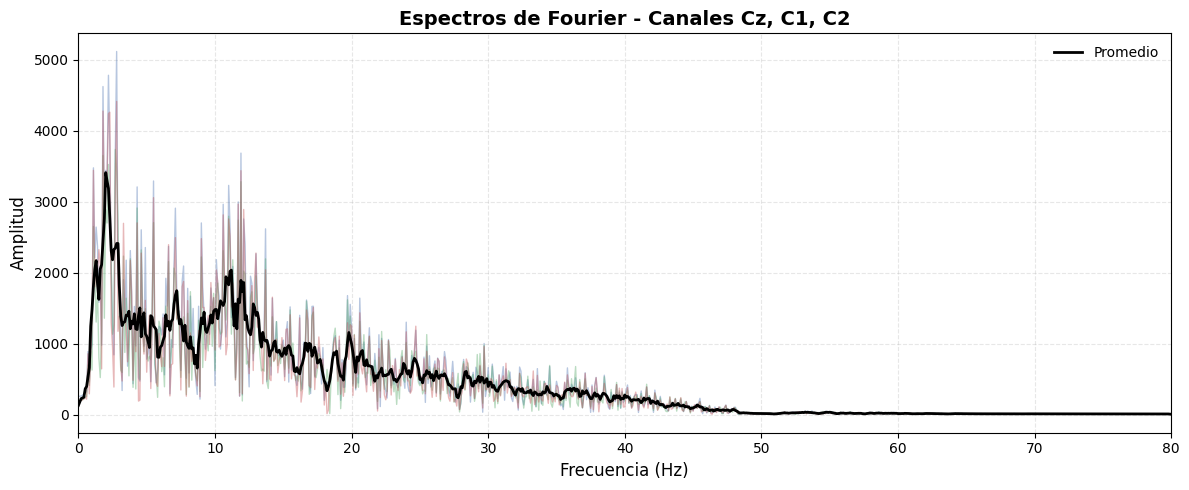

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

In [78]:
eeg.calcular_espectro(["Cz", "C1", "C2"]) #posible mejora agregar referencias cuál señal es cuál

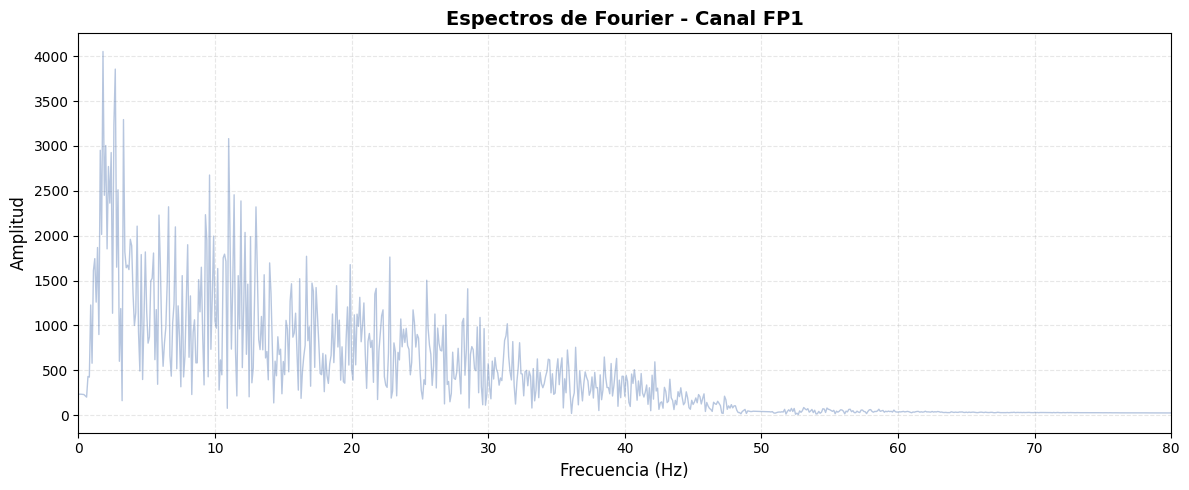

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

In [79]:
eeg.calcular_espectro("FP1")

<h1 style="font-family: 'Times New Roman'; font-size: 19px;">Probando método calcular_tfr() </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Calcular la representación tiempo-frecuencia de un canal EEG permite ver cómo cambian las componentes espectrales a lo largo del tiempo, lo cual es especialmente útil en señales no estacionarias como las del cerebro. A diferencia del espectro de Fourier, que muestra el contenido en frecuencia promedio en una ventana de tiempo, esta representación permite detectar eventos transitorios, como ráfagas de actividad en ciertas bandas (por ejemplo, picos de alfa o beta), que pueden estar relacionados con estímulos, movimientos o estados mentales puntuales. También es útil para analizar cómo se modula la potencia en distintas bandas frente a tareas cognitivas o durante diferentes etapas del sueño. En resumen, permite una caracterización más rica de la señal, combinando lo mejor del análisis temporal y frecuencial.</h1>

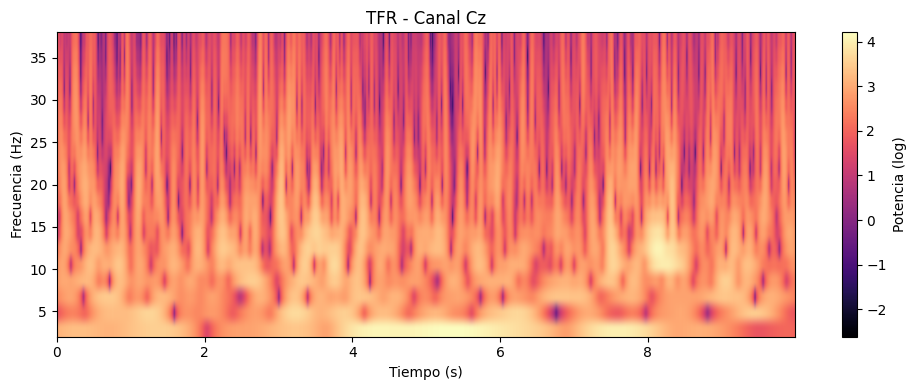

(array([[1228.49017178, 1236.19784019, 1243.90170915, ...,   99.50640637,
           99.23227797,   98.95439847],
        [  51.60595403,   52.79923111,   54.02796729, ...,   59.2162512 ,
           58.99297374,   58.77439254],
        [ 301.12497319,  306.50863241,  311.94248213, ...,  236.24215875,
          232.54125676,  228.84565307],
        ...,
        [  32.53307168,   37.29360451,   42.29729362, ...,   35.14620414,
           32.74925367,   30.37908416],
        [  28.68019595,   32.61563167,   36.64437356, ...,   37.19504653,
           34.75589833,   32.25221396],
        [  25.5490325 ,   28.82288964,   32.07101158, ...,   36.91234543,
           34.68005204,   32.28161907]], shape=(19, 5120)),
 array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
        9.99414062e+00, 9.99609375e+00, 9.99804688e+00], shape=(5120,)))

In [83]:
eeg.calcular_tfr("Cz")

<h1 style="font-family: 'Times New Roman'; font-size: 19px;"> Probando método calcular_hilbert()

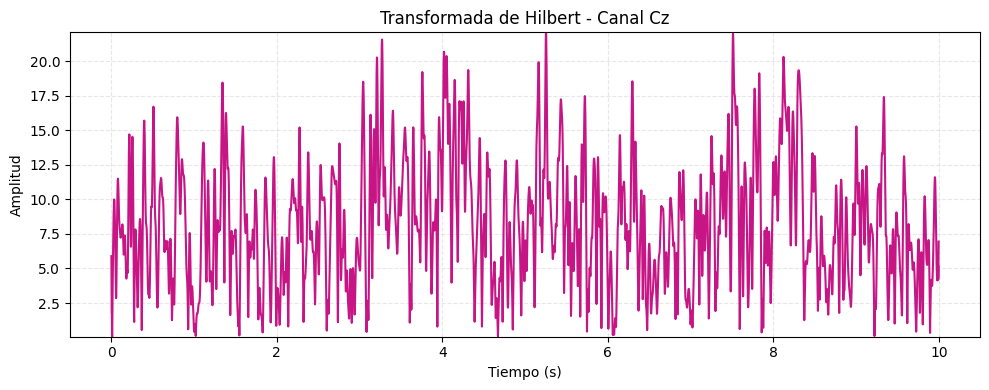

array([[5.89569623, 2.91161728, 1.76543002, ..., 4.2047131 , 5.2828301 ,
        6.95183274]], shape=(1, 5120))

In [ ]:
eeg.calcular_hilbert(canales = "Cz",envelope = True) #plotea cuando es un canal, si es más de uno sólo calcula

<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">6. Integración con MNE</h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">Durante el desarrollo del sistema, optamos por integrar la librería MNE-Python debido a su solidez y popularidad en el procesamiento de señales neurofisiológicas. Como aún no hemos abordado en profundidad ciertos conceptos avanzados de procesamiento, como los distintos tipos de filtros o representaciones en frecuencia, recurrir a MNE nos permitió implementar estas funcionalidades de manera confiable y validada. Para poder utilizar sus métodos, fue necesario adaptar nuestra estructura de datos: cargamos las anotaciones como eventos y construimos un objeto Info de MNE con la información de los canales y la frecuencia de muestreo, lo que nos permitió instanciar un objeto Raw. A partir de ahí, muchos de nuestros métodos —como el cambio de referencia, el cálculo del espectro o la visualización de datos— funcionan como una interfaz simplificada para el usuario, pero internamente aprovechan el procesamiento que ofrece MNE. Esta integración facilitó el desarrollo, permitió mantener una estructura modular y garantiza compatibilidad con herramientas utilizadas en investigación real.</h1>

<h1 style="font-family: 'Times New Roman'; color: hotpink; font-size: 22px;">6. Conclusiones finales </h1>

<h1 style="font-family: 'Times New Roman'; font-size: 17px;">En conclusión, el desarrollo de este sistema nos permitió explorar de forma práctica el diseño orientado a objetos aplicado al procesamiento de señales fisiológicas. A partir de una estructura modular basada en la clase `RawSignal`, logramos extender el sistema a distintos tipos de señales como EEG, ECG y EMG, incorporando métodos específicos para cada caso. La integración con la librería MNE resultó clave para implementar funcionalidades complejas sin perder simplicidad en la interfaz del usuario. Si bien aún estamos en proceso de adquirir algunos conocimientos teóricos sobre procesamiento de señales, este proyecto nos permitió anticiparnos, aprender de manera aplicada y construir una base sólida y reutilizable para futuros desarrollos.</h1>
